# Paramter Inference with CMB Power Spectra

In [2]:
import sys, os
from matplotlib import pyplot as plt
import numpy as np
import camb
import pickle

from pyPIPS.datasets import Datapoint, Dataset

In [3]:
def get_cmb_ps(params):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=params["H0"], ombh2=params["ombh2"], omch2=params["omch2"], mnu=0.06, omk=0, tau=0.06)
    pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
    pars.set_for_lmax(2500, lens_potential_accuracy=0);
    
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')["total"]
    return Datapoint(ks=np.arange(powers.shape[0]), zs=np.arange(powers.shape[1]), P_kz=powers, params=params)

(2551, 4)


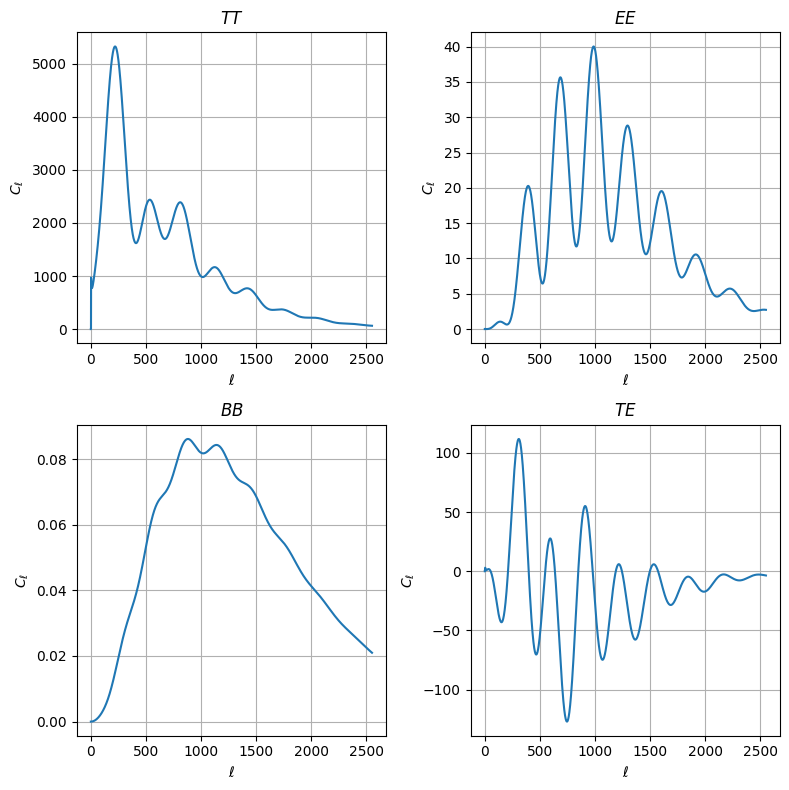

In [4]:
val = get_cmb_ps({"H0": 67.5, "ombh2": 0.022, "omch2": 0.122})
print(val.P_kz.shape)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].plot(val.ks, val.P_kz[:, 0])
axs[0, 0].set_title(r"$TT$")
axs[0, 1].plot(val.ks, val.P_kz[:, 1])
axs[0, 1].set_title(r"$EE$")
axs[1, 0].plot(val.ks, val.P_kz[:, 2])
axs[1, 0].set_title(r"$BB$")
axs[1, 1].plot(val.ks, val.P_kz[:, 3])
axs[1, 1].set_title(r"$TE$")

for ax in axs.flat:
    ax.set(xlabel=r"$\ell$", ylabel=r"$C_\ell$")
    ax.grid()

fig.tight_layout()
plt.show()
plt.close()

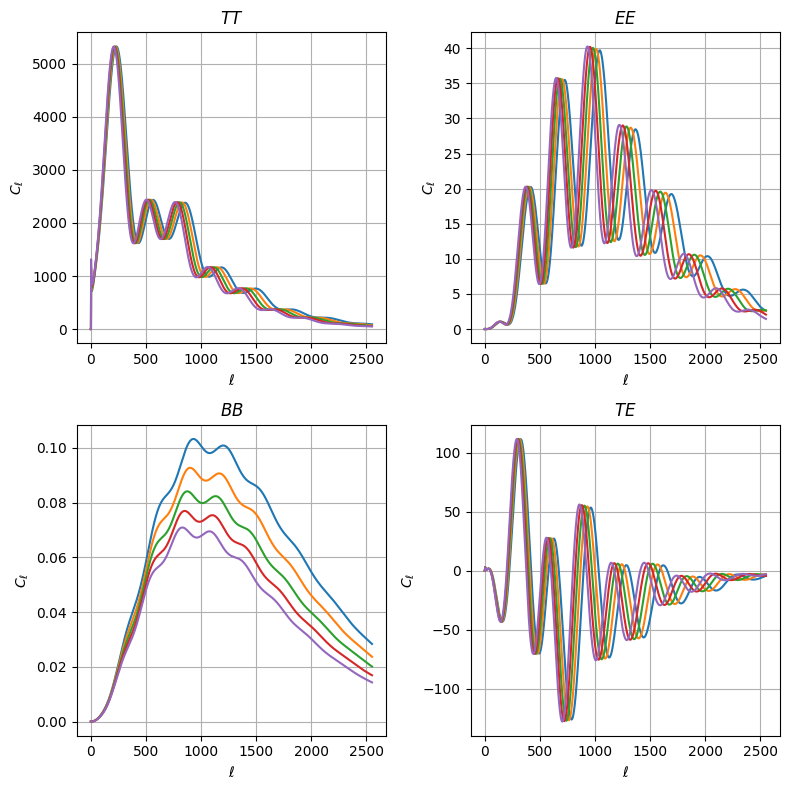

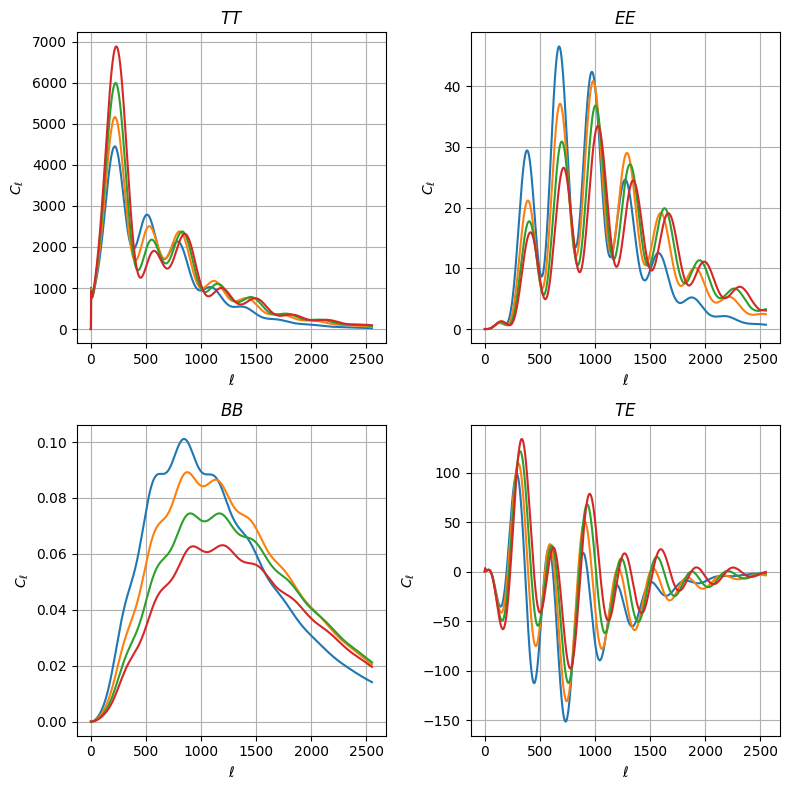

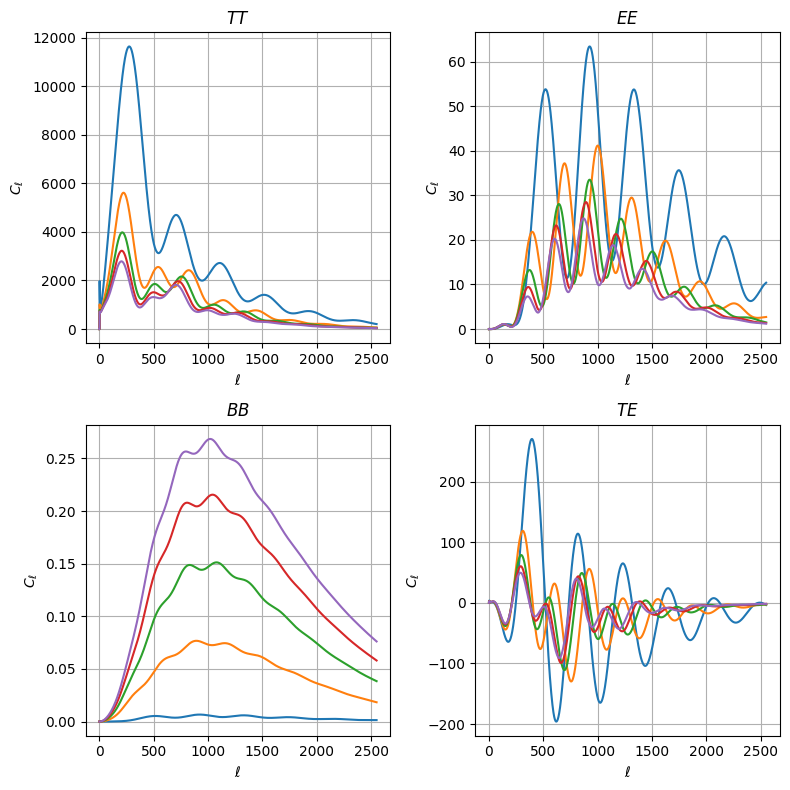

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for H0 in np.arange(50, 100, 10):
    val = get_cmb_ps({"H0": H0, "ombh2": 0.022, "omch2": 0.122})
    axs[0, 0].plot(val.ks, val.P_kz[:, 0])
    axs[0, 0].set_title(r"$TT$")
    axs[0, 1].plot(val.ks, val.P_kz[:, 1])
    axs[0, 1].set_title(r"$EE$")
    axs[1, 0].plot(val.ks, val.P_kz[:, 2])
    axs[1, 0].set_title(r"$BB$")
    axs[1, 1].plot(val.ks, val.P_kz[:, 3])
    axs[1, 1].set_title(r"$TE$")

for ax in axs.flat:
    ax.set(xlabel=r"$\ell$", ylabel=r"$C_\ell$")
    ax.grid()

fig.tight_layout()
plt.show()
plt.close()

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for ombh2 in np.arange(0.01, 0.05, 0.01):
    val = get_cmb_ps({"H0": 67.5, "ombh2": ombh2, "omch2": 0.122})
    axs[0, 0].plot(val.ks, val.P_kz[:, 0])
    axs[0, 0].set_title(r"$TT$")
    axs[0, 1].plot(val.ks, val.P_kz[:, 1])
    axs[0, 1].set_title(r"$EE$")
    axs[1, 0].plot(val.ks, val.P_kz[:, 2])
    axs[1, 0].set_title(r"$BB$")
    axs[1, 1].plot(val.ks, val.P_kz[:, 3])
    axs[1, 1].set_title(r"$TE$")

for ax in axs.flat:
    ax.set(xlabel=r"$\ell$", ylabel=r"$C_\ell$")
    ax.grid()

fig.tight_layout()
plt.show()
plt.close()

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for omch2 in np.arange(0.01, 0.5, 0.1):
    val = get_cmb_ps({"H0": 67.5, "ombh2": 0.022, "omch2": omch2})
    axs[0, 0].plot(val.ks, val.P_kz[:, 0])
    axs[0, 0].set_title(r"$TT$")
    axs[0, 1].plot(val.ks, val.P_kz[:, 1])
    axs[0, 1].set_title(r"$EE$")
    axs[1, 0].plot(val.ks, val.P_kz[:, 2])
    axs[1, 0].set_title(r"$BB$")
    axs[1, 1].plot(val.ks, val.P_kz[:, 3])
    axs[1, 1].set_title(r"$TE$")

for ax in axs.flat:
    ax.set(xlabel=r"$\ell$", ylabel=r"$C_\ell$")
    ax.grid()

fig.tight_layout()
plt.show()
plt.close()

In [6]:
dataset = Dataset()

dataset_save_file = "./data/cmb.pkl"
if os.path.exists(dataset_save_file):
    with open(dataset_save_file, "rb") as f:
        dataset = pickle.load(f)
else:
    dataset = Dataset()
    dataset.generate_from_func(get_cmb_ps, 1000, {"H0": [50, 100], "ombh2": [0.01, 0.05], "omch2": [0.01, 0.5]})
    dataset.save(dataset_save_file)

In [7]:
train, valid, test = dataset.split([0.8, 0.1, 0.1])

print(train.P_kzs.shape)

  0%|          | 0/800 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 2883.20it/s]

(800, 2551, 4)


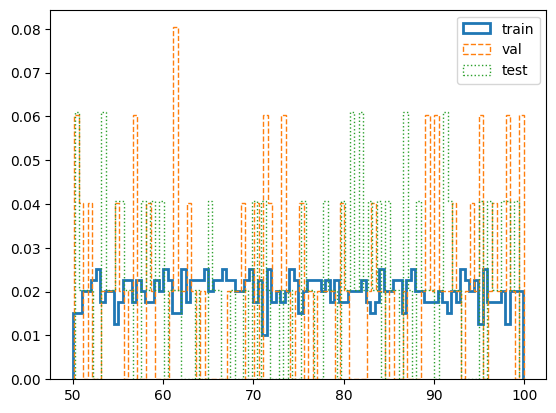

In [8]:
from matplotlib import pyplot as plt

plt.figure()
plt.hist(train.all_parameters[:,0], bins=100, histtype="step", label="train", density=True, linewidth=2)
plt.hist(valid.all_parameters[:,0], bins=100, histtype="step", label="val", density=True, linestyle="--")
plt.hist(test.all_parameters[:,0], bins=100, histtype="step", label="test", density=True, linestyle=":")
plt.legend()
plt.show()
plt.close()

## pyPIPS.models

In [9]:
from pyPIPS.models import BayConvPIPS
import tensorflow as tf

model = BayConvPIPS(train)
model.generate(n_conv=2, f_conv = [8, 16], kernel = [(20, 2), (20, 2)], pool_size=[(20, 2), (20, 2)], \
               n_dense=5, f_dense=[128, 128, 64, 64, 32])
model.compile()

2023-06-23 08:05:18.556948: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 08:05:25.878113: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-23 08:05:40.759705: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/global/cfs/cdirs/des/shubh/.conda/envs/pips/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_flipout (Conv2DFlipo  (None, 2551, 4, 8)       648       
 ut)                                                             
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 2, 8)        0         
 )                                                               
                                                                 
 conv2d_flipout_1 (Conv2DFli  (None, 128, 2, 16)       10256     
 pout)                                                           
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112)               0

In [10]:
model.fit(epochs=1000, verbose=0, val_dataset=valid, callback_epoch=50)

08:05:46, epoch 0: loss: 1038.625	mse: 1929.203	mae: 25.599	val_loss: 373.430	val_mse: 2021.953	val_mae: 26.378	
08:06:27, epoch 50: loss: 179.242	mse: 1282.552	mae: 20.533	val_loss: 179.739	val_mse: 1285.958	val_mae: 20.535	
08:07:07, epoch 100: loss: 162.611	mse: 824.476	mae: 15.455	val_loss: 162.911	val_mse: 793.330	val_mae: 14.664	
08:07:48, epoch 150: loss: 152.509	mse: 442.797	mae: 10.466	val_loss: 152.759	val_mse: 451.184	val_mae: 10.801	
08:08:29, epoch 200: loss: 140.997	mse: 239.514	mae: 7.365	val_loss: 140.911	val_mse: 266.932	val_mae: 7.909	
08:09:10, epoch 250: loss: 124.317	mse: 170.448	mae: 6.193	val_loss: 124.130	val_mse: 166.416	val_mae: 5.955	
08:09:50, epoch 300: loss: 104.008	mse: 158.143	mae: 5.914	val_loss: 103.849	val_mse: 161.978	val_mae: 6.234	
08:10:31, epoch 350: loss: 82.047	mse: 152.709	mae: 5.857	val_loss: 82.070	val_mse: 176.906	val_mae: 6.328	
08:11:11, epoch 400: loss: 63.062	mse: 155.338	mae: 5.862	val_loss: 62.827	val_mse: 172.929	val_mae: 6.238	
08:1

In [1]:
model.epochs

NameError: name 'model' is not defined

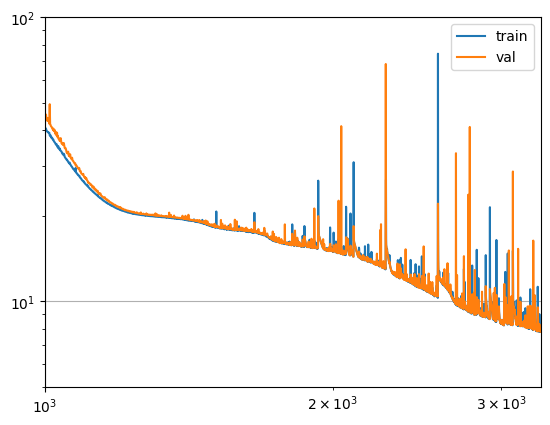

In [58]:
loss, val_loss = map(lambda l: np.hstack(list(map(lambda h: h.history[l], model.history))), ["loss", "val_loss"])
plt.figure()
plt.plot(np.arange(sum(model.epochs)), loss, label="train")
plt.plot(np.arange(sum(model.epochs)), val_loss, label="val")
plt.legend()
plt.grid()
plt.loglog()
plt.ylim(5, 1e2)
plt.xlim(1e3, np.nanmax(np.arange(sum(model.epochs))))
plt.show()
plt.close()

In [12]:
n_pred = 20
plot_subset = valid
predictions = np.empty((n_pred, *plot_subset.all_parameters.shape))
for i in range(n_pred):
    predictions[i] = model.predict(plot_subset, verbose=0)
predictions_best = np.nanmean(predictions, axis=0)
predictions_std = np.nanstd(predictions, axis=0)

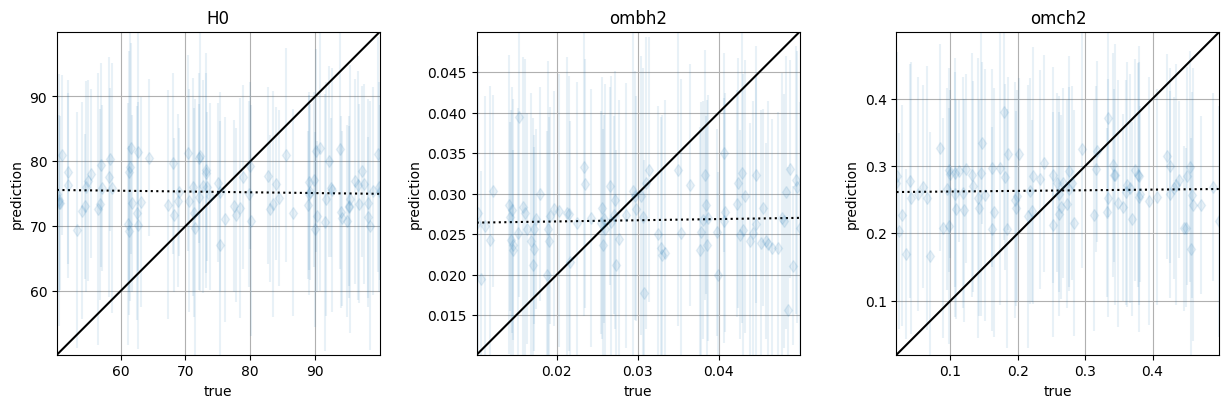

In [14]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
labels = model.parameters
for ind, (label, ax) in enumerate(zip(labels, axs.ravel())):
    low_lim, upp_lim = np.min(plot_subset.all_parameters[:, ind]), np.max(plot_subset.all_parameters[:, ind])
    p = np.poly1d(np.polyfit(plot_subset.all_parameters[:, ind], predictions_best[:, ind], 1))
    ax.errorbar(plot_subset.all_parameters[:, ind], predictions_best[:, ind],  predictions_std[:, ind], marker="d", ls='none', alpha=0.1)
    ax.set_xlabel("true")
    ax.set_ylabel("prediction")
    ax.plot([low_lim, upp_lim], [low_lim, upp_lim], color="black")
    ax.plot([low_lim, upp_lim], [p(low_lim), p(upp_lim)], color="black", ls=":")
    ax.set_xlim([low_lim, upp_lim])
    ax.set_ylim([low_lim, upp_lim])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(label)
    ax.grid()
# plt.savefig("./temp.png")
plt.show()
plt.close()

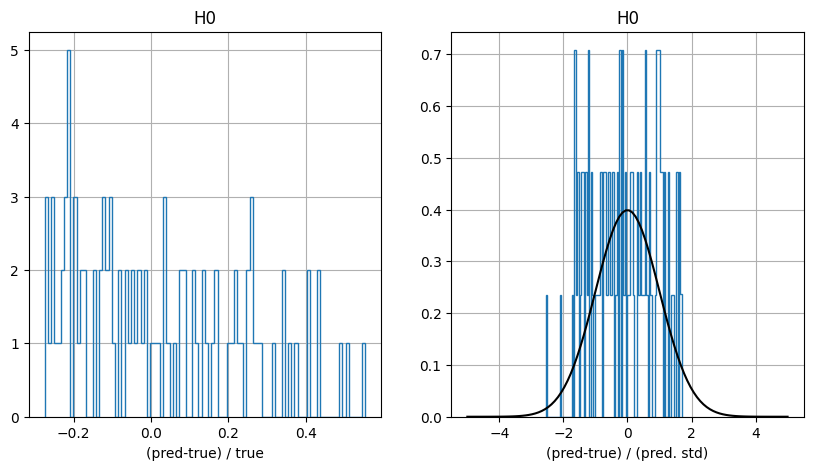

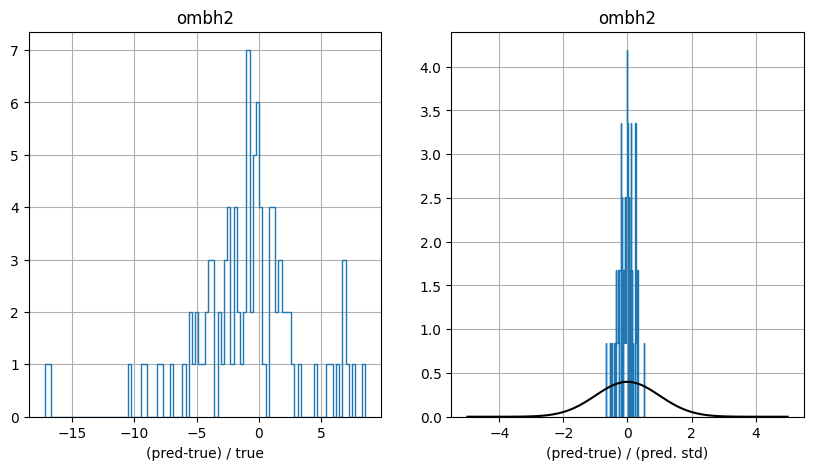

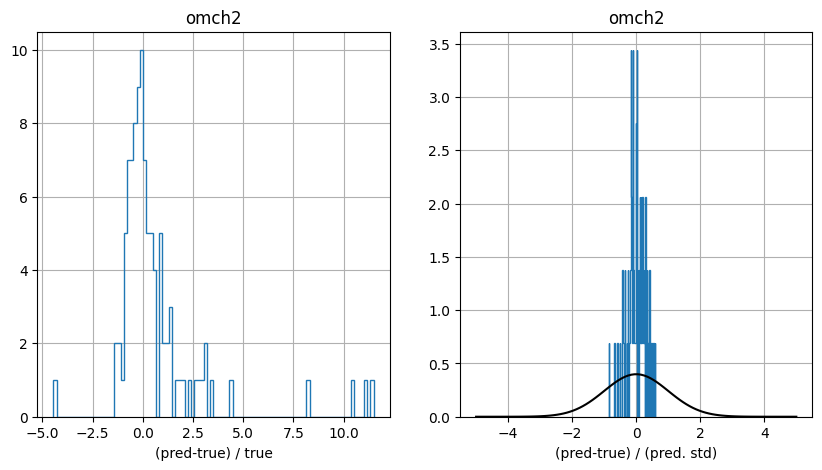

In [17]:
from matplotlib import pyplot as plt

for ind in range(3):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    labels = model.parameters
    ax1.hist((predictions_best[:, ind] - val.all_parameters[:, ind]) / val.all_parameters[:, ind], bins=100, histtype="step")
    ax1.set_xlabel("(pred-true) / true")
    ax1.set_title(labels[ind])
    ax1.grid()

    ax2.hist((predictions_best[:, ind] - val.all_parameters[:, ind]) / predictions_std[:, ind], bins=100, histtype="step", density=True)
    ax2.plot(np.linspace(-5, 5, 100), np.exp(-0.5 * np.linspace(-5, 5, 100)**2) / np.sqrt(2 * np.pi), color="black")
    ax2.set_xlabel("(pred-true) / (pred. std)")
    ax2.set_title(labels[ind])
    ax2.grid()

    # plt.savefig("./temp2.png")
    plt.show()
plt.close()